<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_Machine_Learning/blob/main/11_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'PIL.JpegImagePlugin.JpegImageFile'>


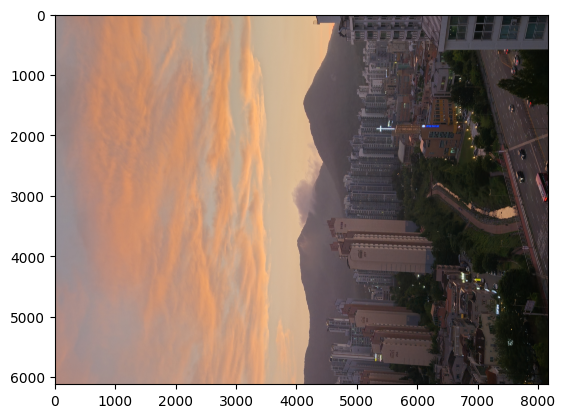

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image #이미지 처리 pillow

img=Image.open('/content/drive/MyDrive/mirae/KakaoTalk_20231101_110835568.jpg')
plt.imshow(img) #이미지 출력
print(type(img)) #JpegImage
plt.show()

In [ ]:
im=np.array(img)
np.array(img).shape #(6120(열 수), 8160(행 수), 3(rgb))
#interlacing : 고속으로 이미지를 웹에서 출력하는 방
im.ndim

3

float64


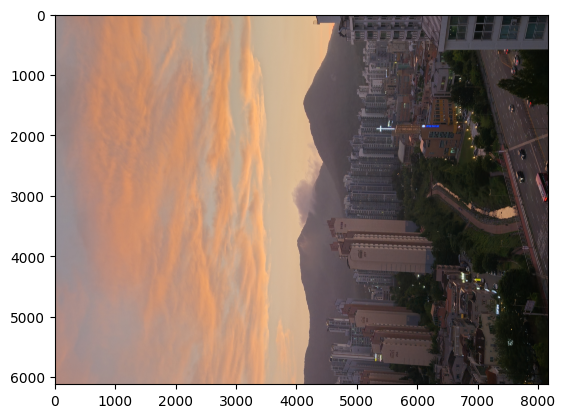

In [ ]:
image_data=np.array(img).astype(float)/255 #이미지 정규화 => 부동 소수점 이미지로 변환
print(image_data.dtype)
plt.imshow(image_data) #정수 이미지와 부동소수점 이미지 둘다 지원
plt.show()

In [ ]:
!pip install pygifsicle #gif animation

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pygifsicle: filename=pygifsicle-1.0.7-py3-none-any.whl size=4091 sha256=b56c8d3c2a7cb77aaf1525da405b4314cc14388663b4c8e93bc1dba12b0740ed
  Stored in directory: /root/.cache/pip/wheels/10/1a/64/20bef5aa8a98420f584a2f5befeccce58aceefcab0063ee429
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5631 sha256=067c0207b28621732e01579bef8c259579938bdfa51863839d32ea560000d05a
  Stored in directory: /root/.cache/pip/wheels/b6/72/c8/3054a5897ba0713dfa7a941364d68cbd42b0755c8e2ec1c18c
Successfully built pygifsicle support_developer


In [ ]:
!apt-get install gifsicle

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  gifsicle
0 upgraded, 1 newly installed, 0 to remove and 9 not upgraded.
Need to get 148 kB of archives.
After this operation, 370 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gifsicle amd64 1.93-2 [148 kB]
Fetched 148 kB in 0s (531 kB/s)
Selecting previously unselected package gifsicle.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../gifsicle_1.93-2_amd64.deb ...
Unpacking gifsicle (1.93-2) ...
Setting up gifsicle (1.93-2) ...
Processing triggers for man-db (2.10.2-1) ...


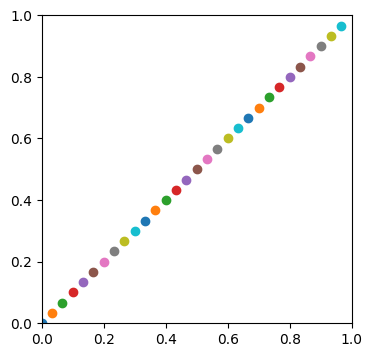

In [ ]:
import imageio.v3 as iio
from pygifsicle import optimize
n=100
gif_path='test.gif'
n=30
plt.figure(figsize=(4,4))
for x in range(n):
  plt.scatter(x/n,x/n)
  plt.xlim(0,1)
  plt.ylim(0,1)
  plt.savefig(f"{x}.jpg")
frames=np.stack([iio.imread(f"{x}.jpg") for x in range(n)],axis=0)
iio.imwrite(gif_path,frames)
#gif animation의 용량으로 압축
optimize(gif_path)

In [ ]:
from scipy import misc
import imageio
face=misc.face() #이미지 학습지원
imageio.imwrite('face.png',face) #이미지 입출력 : imageio
face_read=imageio.imread('face.png')
plt.imshow(face_read)
plt.show()

<ipython-input-8-2f1e1db994d2>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face() #이미지 학습지원
<ipython-input-8-2f1e1db994d2>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face_read=imageio.imread('face.png')


In [ ]:
from scipy import ndimage
rotated_face=ndimage.rotate(face,30)
plt.imshow(face,cmap=plt.cm.gray)
plt.imshow(rotated_face,cmap=plt.cm.gray)
plt.axis('off')

In [ ]:
face.shape #(768, 1024, 3)

In [ ]:
cropped_face=face[100:-100,100:-100]
plt.imshow(cropped_face,cmap=plt.cm.gray)
plt.axis('off')

In [ ]:
face=misc.face()
face=face.sum(axis=2)/3 #z 방향으로
zoomed_face=ndimage.zoom(face,0.5) #컬러를 흑백으로
zoomed_face.shape #(384, 512, 2)
plt.imshow(zoomed_face,vmin=0,vmax=255)
plt.axis('off')

#face
#1차원 : pixel 사각형 한점 : anti-aliasing(계단현상 없애는거)
#2차원 : 한 행 데이터
#3차원 : 이미지

In [ ]:
plt.imshow(zoomed_face,cmap=plt.cm.gray)
plt.show()

<ipython-input-14-7b1e64f99739>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face()


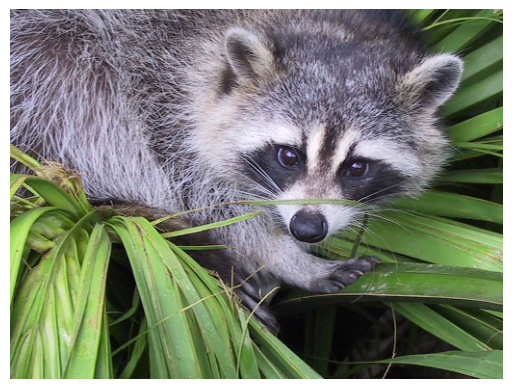

In [ ]:
face=misc.face()
#축소비율 설정(높이와 너비는 0.5, 채널은 1유지)
#(0.5,0.5,1) 3개의 값으로 해상도 비율 조정
#열 해상도 반, 행 해상도 반, 컬러는 그대로
zoomed_face=ndimage.zoom(face,(0.5,0.5,1))
#이미지 출력
plt.imshow(zoomed_face)
plt.axis('off')
plt.show()

<ipython-input-15-3eaf89e89ffe>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face()


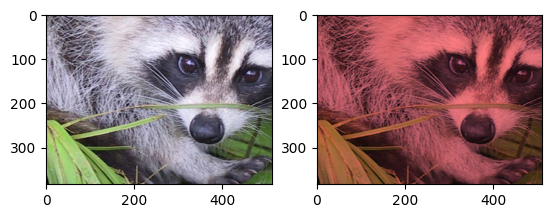

(384, 512, 3)


In [ ]:
face=misc.face()
face=face.astype(float)/255
lx,ly,lz=face.shape
#이미지 사이즈 조절
face=face[int(lx/4):-int(lx/4),int(ly/4):-int(ly/4)]
#컬러 연산
img_tinted=face*[1.0,0.5,0.5] #rgb 컬러 비율
#broadcasting
plt.subplot(1,2,1)
plt.imshow(face)
plt.subplot(1,2,2)
plt.imshow(img_tinted)
plt.show()
print(img_tinted.shape)

In [ ]:
face.shape #(768, 1024, 3)
byte_calc=768 * 1024 * 3 #바이트 단위
print("바이트 : ",byte_calc)
print("킬로바이트 : ",byte_calc/1024)
print("메가바이트 : ",byte_calc/1024/1024)

바이트 :  2359296
킬로바이트 :  2304.0
메가바이트 :  2.25


<ipython-input-17-7d1723266c65>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f=misc.face(gray=True) #흑백이미지


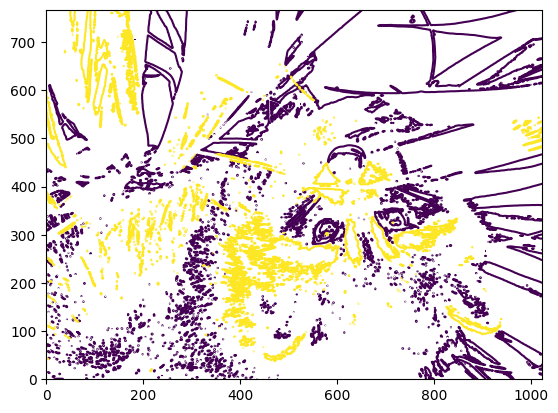

In [ ]:
f=misc.face(gray=True) #흑백이미지
plt.contour(f,[50,200]) #등고선

In [ ]:
face=misc.face(gray=True)
lx,ly=face.shape #768/2, 1024/2 => 중심점
X,Y=np.ogrid[0:lx,0:ly]
X.shape #(768,1)
Y.shape #(1,1024)
#broadcasting 조합을 생성 모든 정점에 대한 좌표
#인덱스가 중심점으로부터의 거리값

<ipython-input-18-019a6987cb2a>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face(gray=True)


(1, 1024)

<ipython-input-19-5def0922e5db>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face(gray=True)


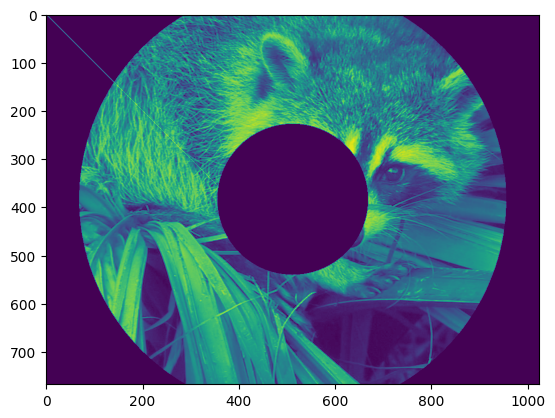

In [ ]:
face=misc.face(gray=True)
lx,ly=face.shape
X,Y=np.ogrid[0:lx,0:ly]
mask=(X-lx/2)**2 + (Y-ly/2)**2 > lx * ly/4 #거리값 공식 #큰 원
mask_2=(X-lx/2)**2 + (Y-ly/2)**2 < lx * ly/32 #작은 원
#True / False로 출력 => boolean indexing
face[mask]=0 #중심에서 원을 기준으로 컬러 : 0 => 검은색
face[range(400),range(400)]=255
face[mask_2]=0
plt.imshow(face)

<ipython-input-20-5864a7271447>:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face=misc.face(gray=True)


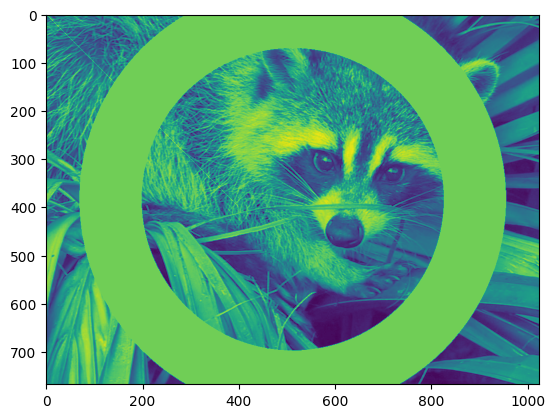

In [ ]:
face=misc.face(gray=True)
mask_1=(X-lx/2)**2 + (Y-ly/2)**2 < lx * ly/4
mask_2=(X-lx/2)**2 + (Y-ly/2)**2 > lx * ly/8
mask_3=mask_1&mask_2
face[range(400),range(400)]=255
face[mask_3]=200
plt.imshow(face)

<ipython-input-21-e711448ac6d0>:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f=scipy.misc.face(gray=True)


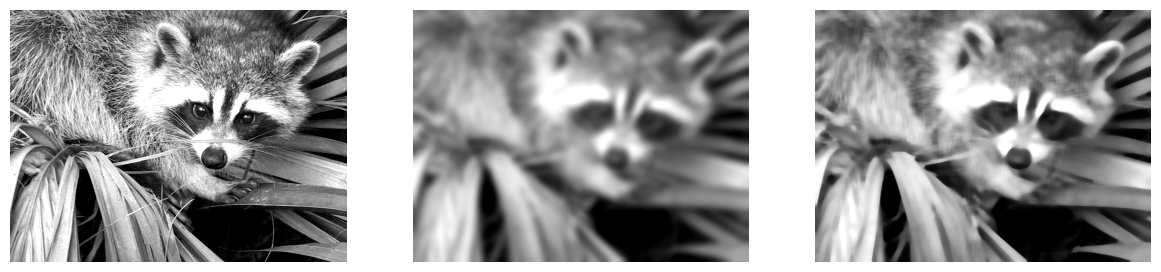

In [ ]:
#filter : CNN에서 filter
import scipy
f=scipy.misc.face(gray=True)
noisy=f+0.6*f.std()*np.random.random(f.shape)
#gaussian_filter 이미지에 사용 : 노이즈 제거
#768*1024
#한칸씩 이동
#768-10+1
#정규분포
#시계열 분석 : 단순 이동 평균법, 가중 이동 평균법, 지수 이동 평균
gauss_denoised=ndimage.gaussian_filter(noisy,10) #필터 사이즈 : 10x10
#median_filter
med_denoised=ndimage.median_filter(noisy,20) #필터 사이즈 : 20x20
plt.figure(figsize=(12,2.8))
plt.subplot(131)
plt.imshow(noisy,cmap=plt.cm.gray,vmin=40,vmax=220)
plt.axis('off')
plt.subplot(132)
plt.imshow(gauss_denoised,cmap=plt.cm.gray,vmin=40,vmax=220)
plt.axis('off')
plt.subplot(133)
plt.imshow(med_denoised,cmap=plt.cm.gray,vmin=40,vmax=220)
plt.axis('off')
plt.subplots_adjust(wspace=0.02,hspace=0.02,top=0.9,bottom=0,left=0,right=1)

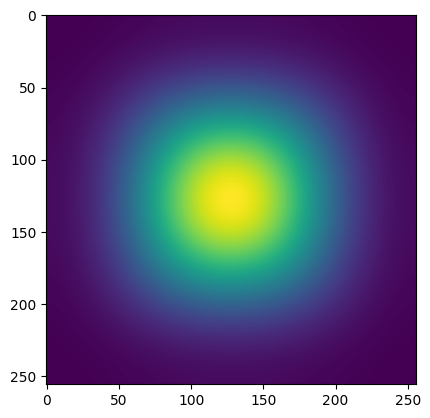

In [ ]:
im=np.zeros((256,256))
im[64:-64,64:-64]=1
im[90:-90,90:-90]=2
im=ndimage.gaussian_filter(im,32)
plt.imshow(im)
plt.show()

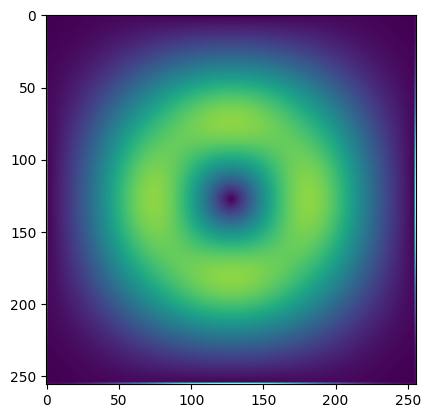

In [ ]:
#sobel filter : edge detection
#경계선을 구하는 필터
#작은 필터는 작은 특징을 잡아내고 큰 필터는 큰 범위를 잡음
#0 1 0
#0 1 0
#0 1 0

#0 0 0
#1 1 1
#0 0 0

#프로젝트 발표때 그래프의 변화량을 gif animation으로 표현할 것
sx=ndimage.sobel(im,axis=1,mode='constant')
sy=ndimage.sobel(im,axis=0,mode='constant')
sob=np.hypot(sx,sy) #피타고라스 정리에 의해서 값 결정

plt.imshow(sob)
plt.show()

In [ ]:
from skimage.color import rgb2gray
from skimage.io import imread
from scipy import ndimage as ndi
#흑백 이미지로 변환
img=rgb2gray(imread('/content/drive/MyDrive/mirae/KakaoTalk_20231101_110835568.jpg'))
w,h=img.shape


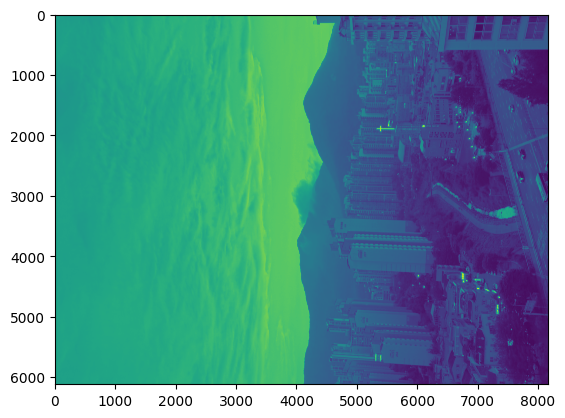

In [ ]:
mat_identity=np.array([[1,0,0],[0,1,0],[0,0,1]]) #단위행렬
# @ 행렬연산
img1=ndi.affine_transform(img,mat_identity) #동차 좌표계에서 변환
plt.imshow(img1)
plt.show()

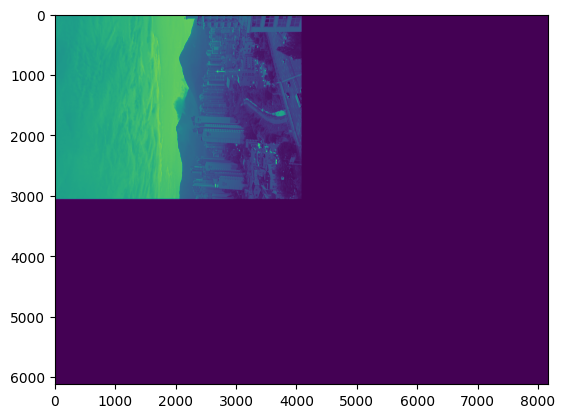

In [ ]:
mat_identity=np.array([[2,0,0],[0,2,0],[0,0,1]]) #대각
# @ 행렬연산
img1=ndi.affine_transform(img,mat_identity) #동차 좌표계에서 변환
plt.imshow(img1)
plt.show()

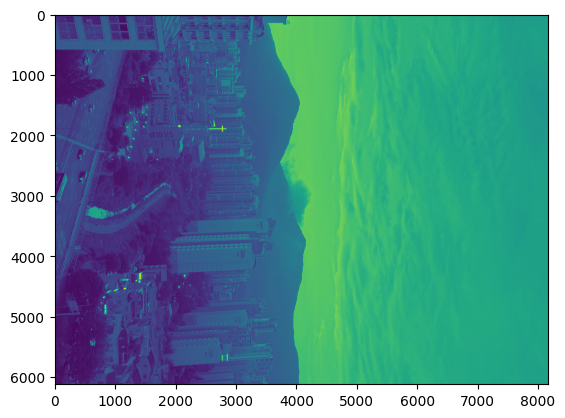

In [ ]:
#반사행렬 : 물 반사, 거울 반사(거울, 물)
mat_reflect=np.array([[1,0,0],[0,-1,0],[0,0,1]])@np.array([[1,0,0],[0,1,-h],[0,0,1]])
img1=ndimage.affine_transform(img,mat_reflect)
plt.imshow(img1)
plt.show()

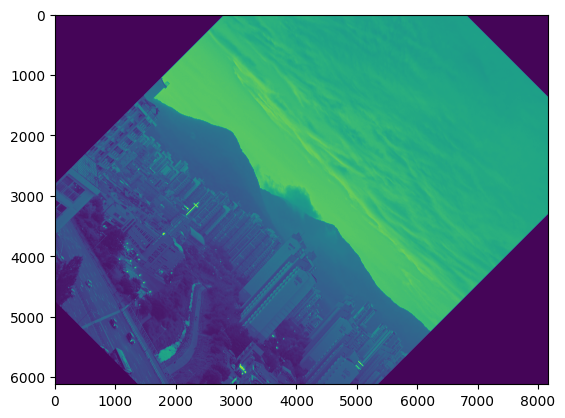

In [ ]:
#회전은 원점을 중심하고 회전
img=rgb2gray(imread('/content/drive/MyDrive/mirae/KakaoTalk_20231101_110835568.jpg'))
theta=np.pi/4
mat_rotate=np.array([[1,0,w/2],[0,1,h/2],[0,0,1]])@np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]])@np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img1=ndi.affine_transform(img,mat_rotate)
plt.imshow(img1)
plt.show()

In [ ]:
#행렬곱 연산은 변환의 합
#Deep learning : layer가 깊어짐
#가중치 @ 가중치 @ 가중치 -> 변환의 합 : 분류/예측

In [ ]:
from scipy import linalg
import numpy as np
A=np.array([[1,2],[3,4]])
A=A@A.T #결과가 허수
l,v=linalg.eig(A)
print(l)
print(v)

[ 0.13393125+0.j 29.86606875+0.j]
[[-0.9145143  -0.40455358]
 [ 0.40455358 -0.9145143 ]]


R       norm, dnorm, pnorm, qnorm

=python  rvs,  pdf,   cdf,   ppf

rvs(random)

pdf(density)

cdf(cumuative)

ppf(percent)

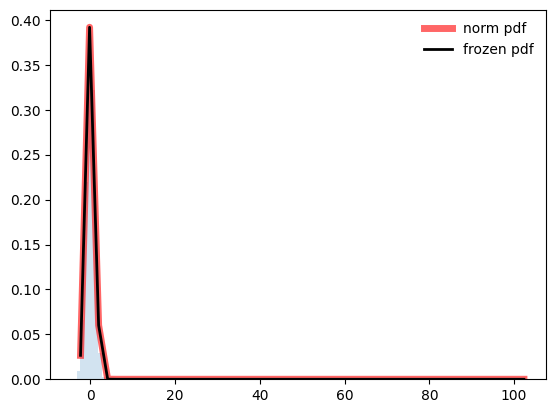

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
#1차적률, 2차적률, 3차적률, 4차적률
mean,var,skew,kurt=norm.stats(moments='mvsk') #mvsk : mean,var,skew,kurt
#분위ㅜㅅ
x=np.linspace(norm.ppf(0.01),norm.ppf((0.99),100))
#확률 밀도 함수 값
ax.plot(x,norm.pdf(x),'r-',lw=5,alpha=0.6,label='norm pdf')
rv=norm() #인스턴스
ax.plot(x,rv.pdf(x),'k-',lw=2,label='frozen pdf')
vals=norm.ppf([0.001,0.5,0.999]) #ppf의 매개변수 cdf값
np.allclose([0.001,0.5,0.999],norm.cdf(vals)) #모두 같
r=norm.rvs(size=100000)
ax.hist(r,density=True,histtype='stepfilled',alpha=0.2) #투명도
ax.legend(loc='best',frameon=False) #범례의 위치
plt.show()

In [ ]:
#평균 테스트 : 평균(귀무가설에 대한)
from scipy import stats
Y=stats.norm()
print(len(Y.rvs(size=1000)))
stats.ttest_1samp(Y.rvs(size=1000),0.1)
#귀무가설을 기각하지 못한다

1000


TtestResult(statistic=-1.509142098791164, pvalue=0.1315786640117293, df=999)

In [ ]:
stats.ttest_1samp(Y.rvs(size=1000),Y.mean())
#귀무가설을 기각하고 대립가설을 채택

TtestResult(statistic=2.671969515302846, pvalue=0.007663487576936531, df=999)

In [ ]:
data1=Y.rvs(size=1000)
data2=Y.rvs(size=1000)
#귀무가설 : 두 집단의 평균이 같다
#대립가설 : 두 집단의 평균이 유의미하게 다르다
t_statistics,p_value=stats.ttest_ind(data1,data2)
print("t 통계값 :",t_statistics)
print("p_value : ",p_value) #귀무가설을 기각하지 못한다(두 집단의 평균은 같)

t 통계값 : -0.3800944282763328
p_value :  0.7039157213444722


In [ ]:
#귀무가설 : 상관이 없다
#대립가설 : 상관이 있다
dalc = np.array([6.47,6.13,6.19,4.89,5.63,4.52,5.89,4.79,5.27,6.08])
dtob = np.array([4.03,3.76,3.77,3.34,3.47,2.92,3.2,2.71,3.53,4.51])
stats.pearsonr(dalc, dtob) #귀무 가설을 기각하지 못하고 두 데이터는 상관이 있다

PearsonRResult(statistic=0.7842873201538678, pvalue=0.0072343583517294864)

In [ ]:
#선형회귀
#귀무가설 : 기울기가 0일 것이다
#대립가설 : 기울기가 0이 아닐 것이다.
print(stats.linregress(dalc,dtob))

LinregressResult(slope=0.6115012914647241, intercept=0.10815378587805125, rvalue=0.7842873201538676, pvalue=0.007234358351729509, stderr=0.17102020517368527, intercept_stderr=0.9616276197074791)


optimize

In [ ]:
from scipy.optimize import curve_fit
x=np.array([0.0,1.0,2.0,3.0,4.0,5.0])
y=np.array([0.0,0.8,0.9,0.1,-0.8,-1.0])
#함수 관계
z=np.polyfit(x,y,3) #3차 방정식
print("3차 다항식의 계수 : ",z)
p=np.poly1d(z)
print(p)
p(0.5)
p(3.5)
p(10)

3차 다항식의 계수 :  [ 0.08703704 -0.81349206  1.69312169 -0.03968254]
         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


22.579365079364877

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


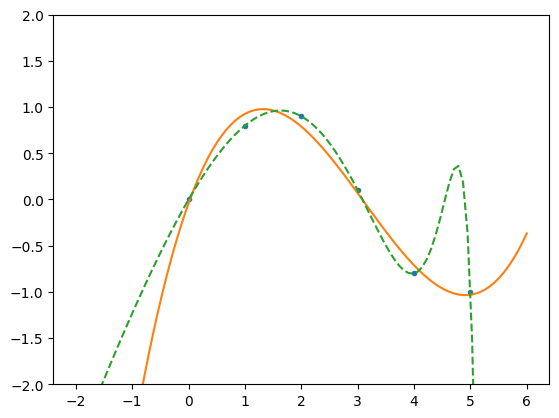

In [ ]:
xp=np.linspace(-2,6,100)
p30=np.poly1d(np.polyfit(x,y,30)) #과적합 : 학습 데이터에만 사용 가능한 방정식
_=plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp),'--')
plt.ylim(-2,2)
plt.show()

In [ ]:
from scipy import optimize
def f(x):
  return 4*x**3+(x-2)**2+x**4

inferential 추론(확률) : 최대 우도법
* 모집단의 분포가 중요하지만 데이터에 적합한 분포를 모를 때 -> 최대 우도법
* 추론 : 가능도가 가장 큰 것을 모집단의 분포로 예상

diffential 미분(기울기==0 : 초월 구성 : 범위를 주고 무작위 대입법)

huristic 탐색법, 방법
* 게임 : 케릭터 : 자동이동
* 현재지점-----------목표지점
* grid 생성(8개의 방향)- 목표지점까지의 비용 계산
* 비용이 가장 작은 것을 선택(트리)
*선택

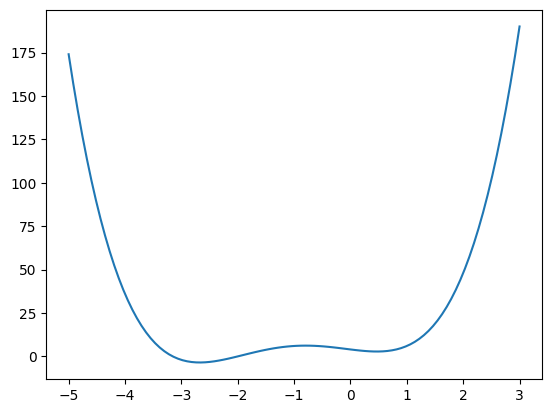

In [ ]:
fig,ax=plt.subplots()
x=np.linspace(-5,3,100)
ax.plot(x,f(x))

BFGS : quasi-Newton(근처의 값을 알려줘야함)

In [ ]:
x_min=optimize.fmin_bfgs(f,-2)
x_min

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

In [ ]:
#무작위 대입법
optimize.brent(f)

0.46961743402759754

In [ ]:
optimize.fminbound(f,-4,2) #범위 내에서 확인

-2.6729822917513886

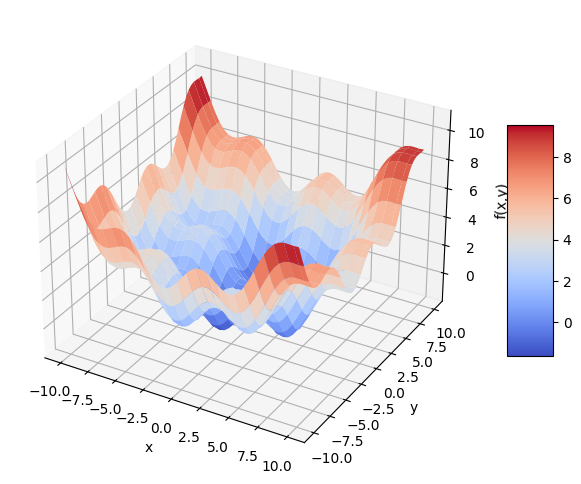

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
def fm(p):
  x,y=p
  return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)
x=np.linspace(-10,10,50)
y=np.linspace(-10,10,50)
X,Y=np.meshgrid(x,y) #50x50 grid 생성
Z=fm((X,Y))
fig=plt.figure(figsize=(9,6))
ax=fig.add_subplot(projection='3d')
surf=ax.plot_surface(X,Y,Z, rstride=2,cstride=2,cmap=mpl.cm.coolwarm,linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf,shrink=0.5,aspect=5)

In [ ]:
import scipy.optimize as spo

def fo(p):
  x,y=p
  z=np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2
  if output==True:
    print('%8.4f %8.4f %8.4f'%(x,y,z))
  return z
output=False
#무작위 대입법 : 정밀도를 어떻게 주는가에 따라 결과값이 달라짐
opt0=spo.brute(fo,((-10,10.1,5),(-10,10.1,5)),finish=None)
print(opt1)
output=False
#자원의 한계(시간, 메모리)
opt1=spo.brute(fo,((-10,10.1,0.1),(-10,10.1,0.1)),finish=None)
print(opt1) #[-1.4,-1.4]

NameError: ignored

In [ ]:
#미분을 사용하지 않음
output=True
opt_out=spo.fmin(fo,opt1,xtol=0.001,ftol=0.001,maxiter=15,maxfun=20)

print(opt_out)
fm(opt_out)
optput=False
#[-1.42702972 -1.42876755]

In [ ]:
import pandas as pd
read_file=pd.read_csv('/content/drive/MyDrive/mirae/play_top30.csv',skiprows=1)
read_file.head()

In [ ]:
read_file.describe()

In [ ]:
a=read_file.describe()
a.boxplot()
plt.show

In [ ]:
import seaborn as sns
sns.boxplot(data=read_file)
plt.show()

In [ ]:
re_file = read_file.rename(columns = {'P':'points', 'G':'goals', 'A':'Assists', 'S%':'shooting_percentage', 'Shift/GP1':'shifts_per_game_playerd'})

In [ ]:
G=re_file[['goals','Assists','points']]
t=G.corr(method='pearson')
t

In [ ]:
a1=list(re_file['S'])
plt.plot(a1,'ro')
plt.savefig('player.png')
plt.show()

In [ ]:
re_file["S"].plot()

In [ ]:
#문제
#각 열 중에 ['player','points','goals','assists] 열만 출력하는 함수를 작성하시오

#re_file[['Player','points','goals','Assists']]

def select_player(x):
  df=x.loc[:,['Player','points','goals','Assists']]
  return df

select_player(re_file)

In [ ]:
#행 열 제약이 있는 함수 작성
#각 열 중 lower<points <= upper인 데이터 중 ['Player','points','goals','Assists'] 열만 출력하시오

def point_select(x,lower,upper):
  target=x.where(x['points']>lower)
  target=target.where(target['points']<=upper)
  target=target.dropna()
  return select_player(target)

point_select(re_file,75,80)

In [ ]:
def point_select(x,variable,lower,upper):
  target=x.where(x[variable]>lower)
  target=target.where(target[variable]<=upper)
  target=target.dropna()
  return select_player(target)

point_select(re_file,'points',75,80)

In [ ]:
#문제
#assists와 goal 간의 상관관계를 확인하고 회귀식을 작성한 다음 goals가 [50,70,40,20]인 경우의 assists를 predict하시오
#위의 회귀식 작성과 예측을 함수화하시오

ag=re_file[['goals','Assists']]
t=ag.corr(method='pearson')
t
def reg(x,y):
  return stats.linregress(x,y)

slope, intercept, r_value, p_value, std_err =reg(re_file.Assists,re_file.goals)

def y(x):
  return slope * x + intercept

goals_test=np.array([50,70,40,20])
predict = y(goals_test)
print("예상 어시스트 수 : ",predict)

sns.regplot(x='goals',y='Assists',data=re_file)